## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [270]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [3]:
student=pd.read_csv('students-data.csv', delimiter=';')

In [4]:
student.sample(10).T

,302,116,137,279,179,27,369,220,107,282
school,GP,GP,GP,GP,GP,GP,MS,GP,GP,GP
sex,F,M,F,M,M,M,F,F,M,F
age,17,15,16,18,17,15,18,17,16,18
address,U,U,U,U,U,U,R,R,U,R
famsize,GT3,GT3,GT3,LE3,GT3,GT3,GT3,GT3,GT3,LE3
Pstatus,T,T,A,T,T,T,T,T,T,T
Medu,4,4,3,4,4,4,4,2,3,1
Fedu,2,4,3,3,3,2,4,1,3,1
Mjob,other,other,other,teacher,other,health,other,at_home,services,at_home
Fjob,other,teacher,other,services,other,services,teacher,services,other,other


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
student.index.names=['number']
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
student.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
student.dropna(axis=0,inplace=True)
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

###### As we see info shows that there were total 395 rows and each variable is showing 395 count hence there is no missing values. 

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [9]:
student.select_dtypes(exclude=np.number).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [65]:
student.var()<1

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [68]:
student_new=student.drop(student[student.select_dtypes(include=np.number).columns].loc[:,student.var()<1].columns, axis=1)
student_new.head(2).T

number,0,1
school,GP,GP
sex,F,F
age,18,17
address,U,U
famsize,GT3,GT3
Pstatus,A,T
Medu,4,1
Fedu,4,1
Mjob,at_home,at_home
Fjob,teacher,other


In [67]:
student_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [70]:
le=LabelEncoder()

In [74]:
for column in student_new[student_new.select_dtypes(exclude=np.number).columns]:
    student_new[column]=le.fit_transform(student_new[column])
student_new.head().T

number,0,1,2,3,4
school,0,0,0,0,0
sex,0,0,0,0,0
age,18,17,15,15,16
address,1,1,1,1,1
famsize,0,0,1,0,0
Pstatus,0,1,1,1,1
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,0,0,0,1,2
Fjob,4,2,2,3,2


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [94]:
student_new[['G1','G2','G3']].head()

,G1,G2,G3
number,,,
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [95]:
for column in student_new[['G1','G2','G3']]:
    student_new[column]=student_new[column].apply(lambda x: 1 if x>=10 else 0)
student_new[['G1','G2','G3']].head()

,G1,G2,G3
number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


In [96]:
student_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [98]:
X=student_new.drop('G3',axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [135]:
y=student_new[['G3']]
y.head()

,G3
number,
0,0
1,0
2,1
3,1
4,1


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

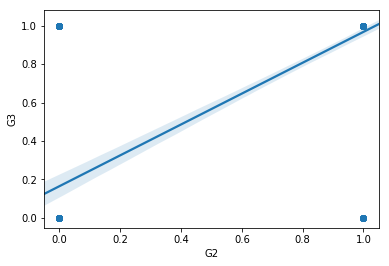

In [136]:
sns.regplot(student_new['G2'],student_new['G3'])

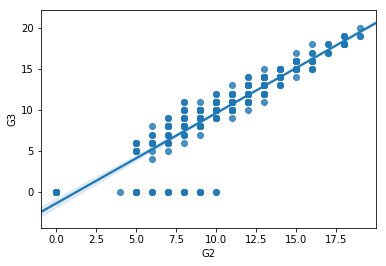

In [138]:
sns.regplot(student['G2'],student['G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


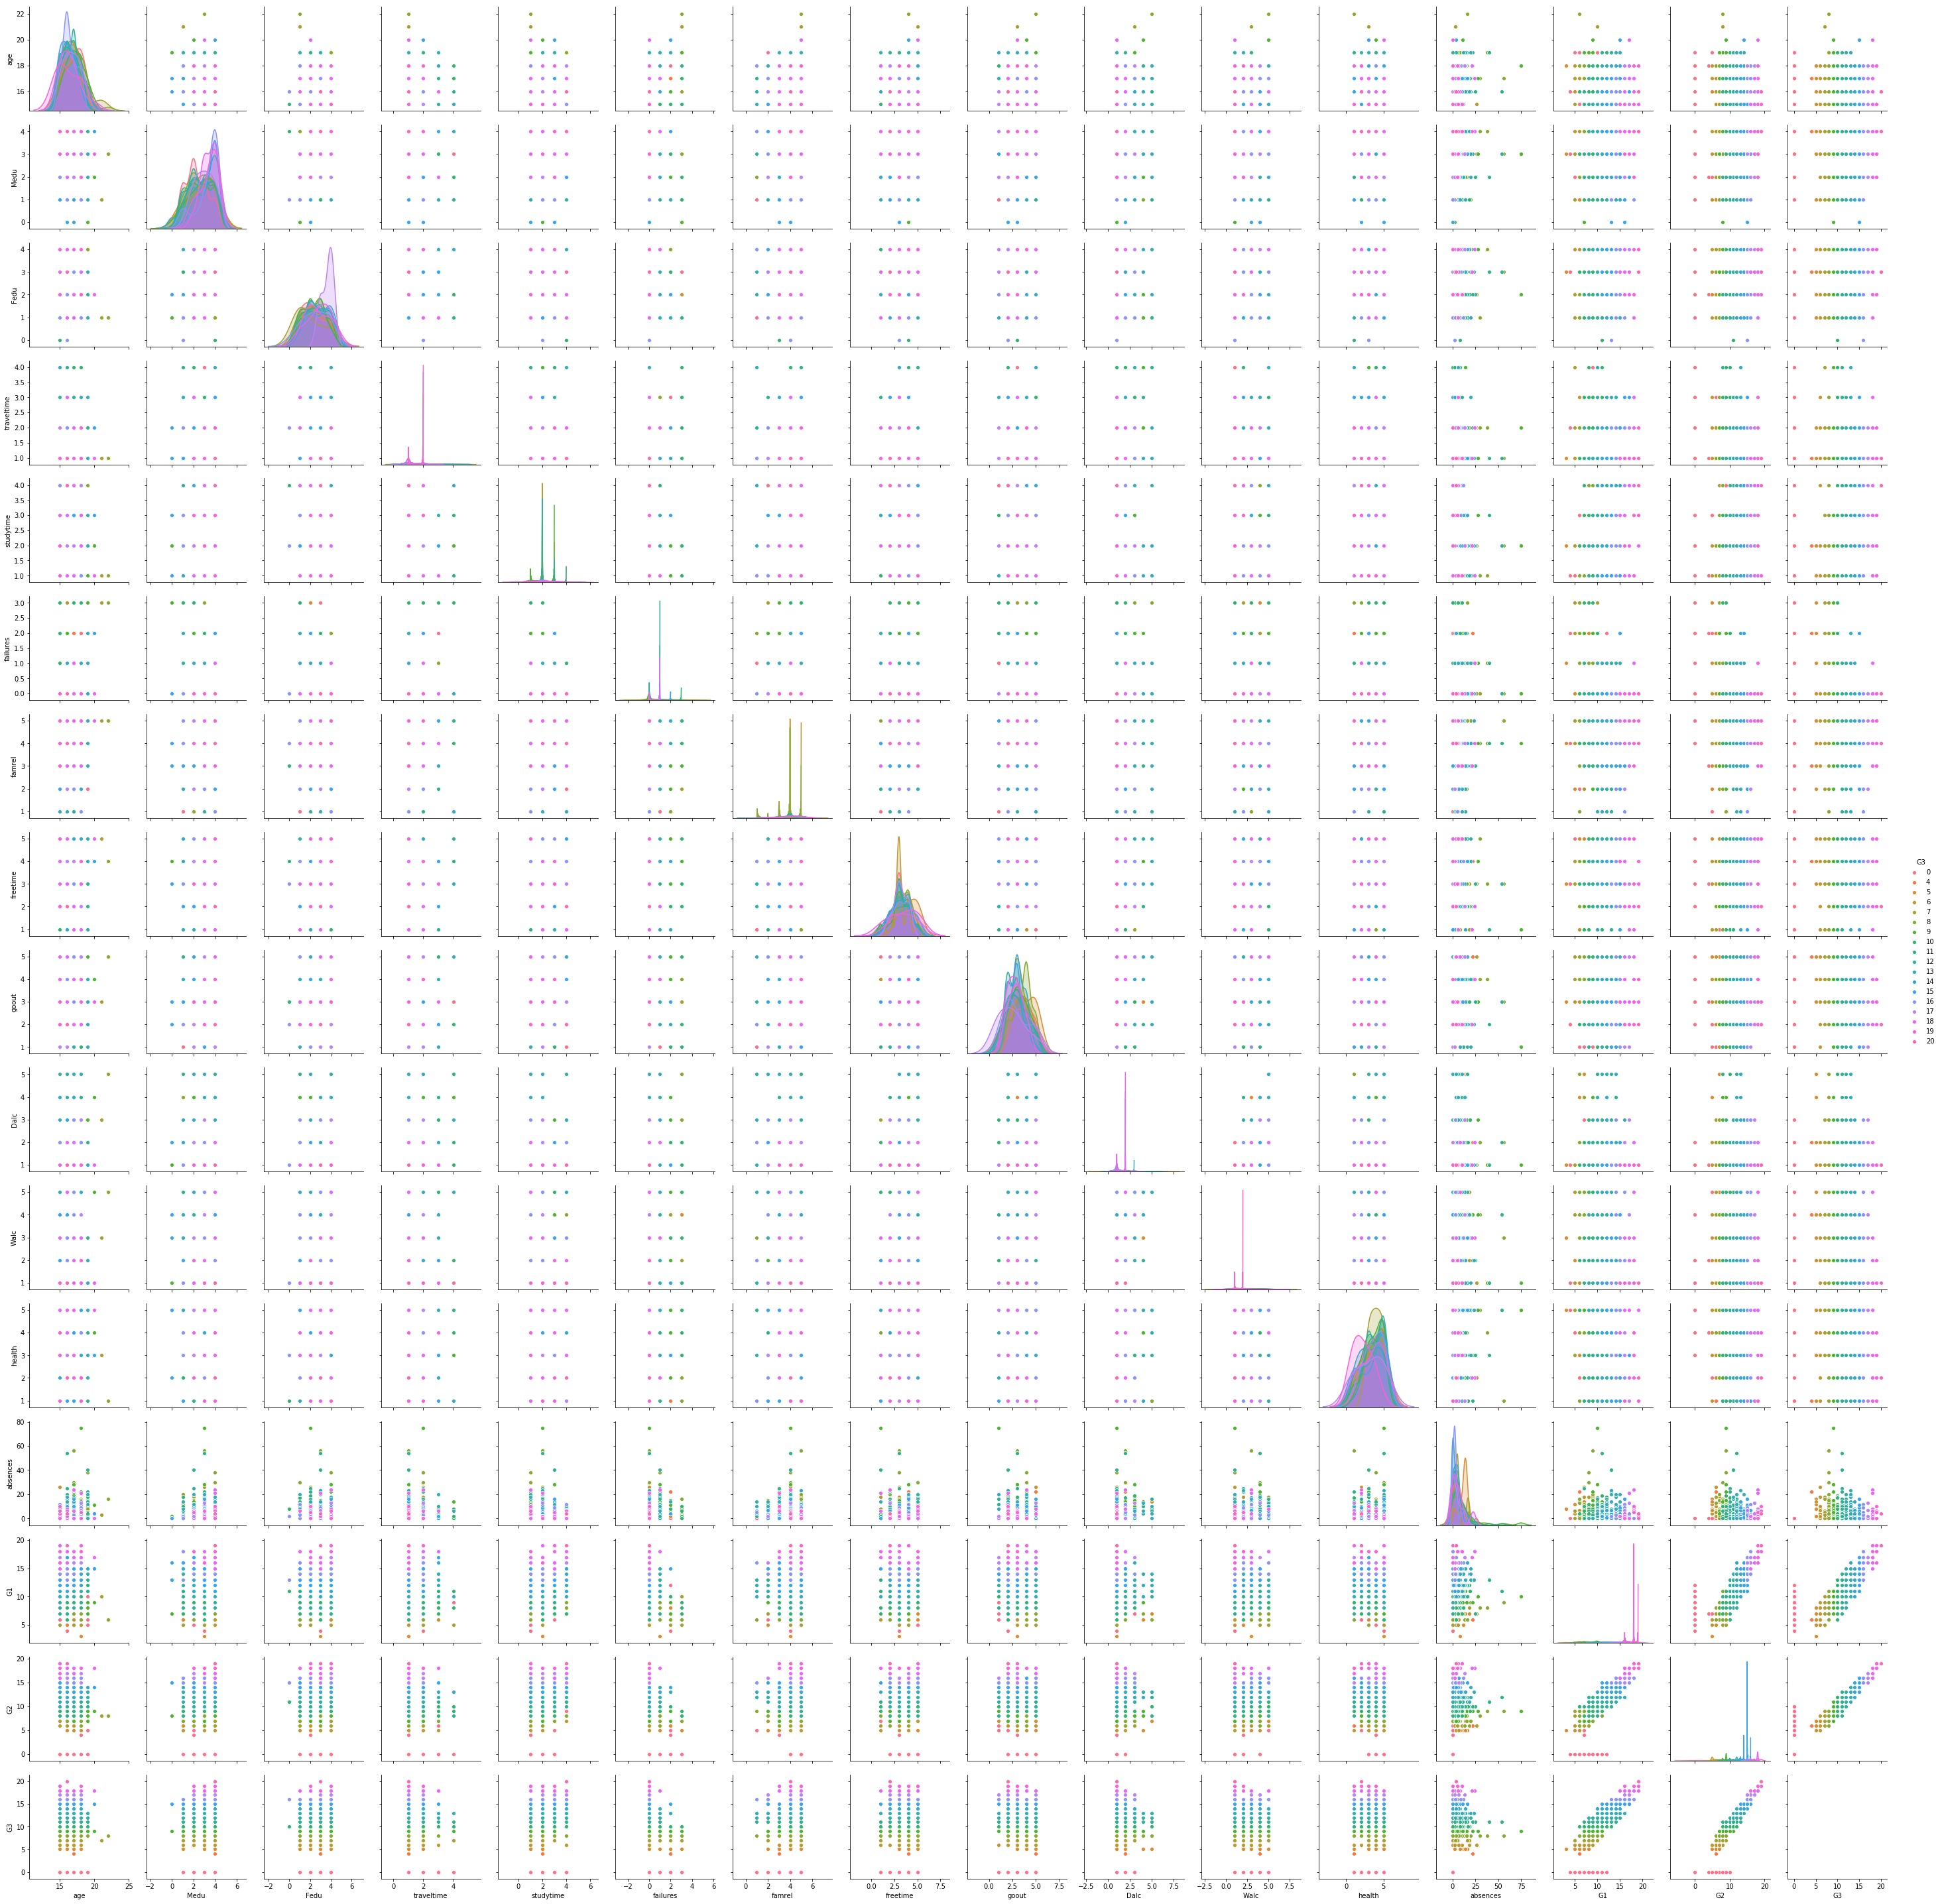

In [139]:
sns.pairplot(student,hue='G3')

###### if we see in pairplot or regplot, it is clearly showing strong positive correlation between G1 ,G3 and G2, G3. 

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

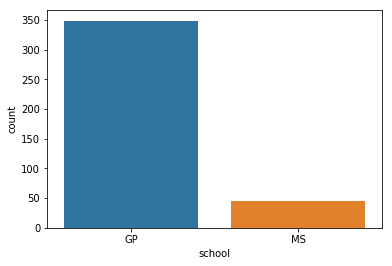

In [141]:
sns.countplot(student['school'])

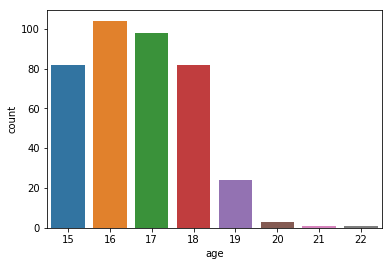

In [142]:
sns.countplot(student['age'])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=95,random_state=10)

In [147]:
print('Training set X:',X_train.shape, '\nTraining set y:', y_train.shape)
print('Test set X:',X_test.shape, '\nTest set y:', y_test.shape)

Training set X: (300, 26) 
Training set y: (300, 1)
Test set X: (95, 26) 
Test set y: (95, 1)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [149]:
lr=LogisticRegression()

In [165]:
lr.fit(X_train,y_train)
predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)
print('Training Score:' ,lr.score(X_train, y_train), '\tTest Score:' ,lr.score(X_test, y_test))

cm_train=metrics.confusion_matrix(y_train, predict_train)
precision_train=cm_train[1,1]/(cm_train[0,1]+cm_train[1,1])
recall_train=cm_train[1,1]/(cm_train[1,0]+cm_train[1,1])
F1_train=(2*precision_train*recall_train)/(precision_train+recall_train)

cm=metrics.confusion_matrix(y_test, predict_test)
precision_test=cm[1,1]/(cm[0,1]+cm[1,1])
recall_test=cm[1,1]/(cm[1,0]+cm[1,1])
F1_test=(2*precision_test*recall_test)/(precision_test+recall_test)

print ('\nTraining Confusion Matrix:\n', metrics.confusion_matrix(y_train, predict_train)) 
print('Training Precision Score:', precision_train)
print('Training Recall Score:' ,recall_train)
print('Training F1 Score:',F1_train)

print ('\nTesting Confusion Matrix:\n', metrics.confusion_matrix(y_test, predict_test)) 
print('Testing Precision Score:', precision_test)
print('Testing Recall Score:' ,recall_test)
print('Testing F1 Score:',F1_test)
#

Training Score: 0.9266666666666666 	Test Score: 0.8736842105263158

Training Confusion Matrix:
 [[ 93   8]
 [ 14 185]]
Training Precision Score: 0.9585492227979274
Training Recall Score: 0.9296482412060302
Training F1 Score: 0.9438775510204082

Testing Confusion Matrix:
 [[24  5]
 [ 7 59]]
Testing Precision Score: 0.921875
Testing Recall Score: 0.8939393939393939
Testing F1 Score: 0.9076923076923077


In [172]:
#By using CV
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='accuracy')
accuracy=scores.mean()
print('Accuracy:',accuracy)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='recall')
recall=scores.mean()
print('Recall:' , recall)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='precision')
precision=scores.mean()
print('Precision:',precision)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')
f1=scores.mean()
print('F1 score:',f1)

Accuracy: 0.9001928068223952
Recall: 0.925
Precision: 0.928579683728425
F1 score: 0.923535047313296


# Naive bayes with Iris data

### Import Iris.csv

In [196]:
iris=pd.read_csv('iris.csv')

In [174]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

###### removing 1st column 'Id' from independent list as it is just a sequence of numbers and does not impact target variable. 

In [192]:
X=iris.iloc[:,1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [176]:
y=iris.iloc[:,5]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Find the distribution of target variable (Class)

In [177]:
iris['Species'].value_counts()

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

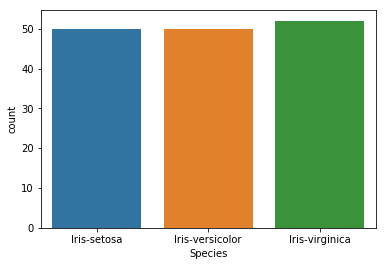

In [180]:
sns.countplot(iris['Species'])

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

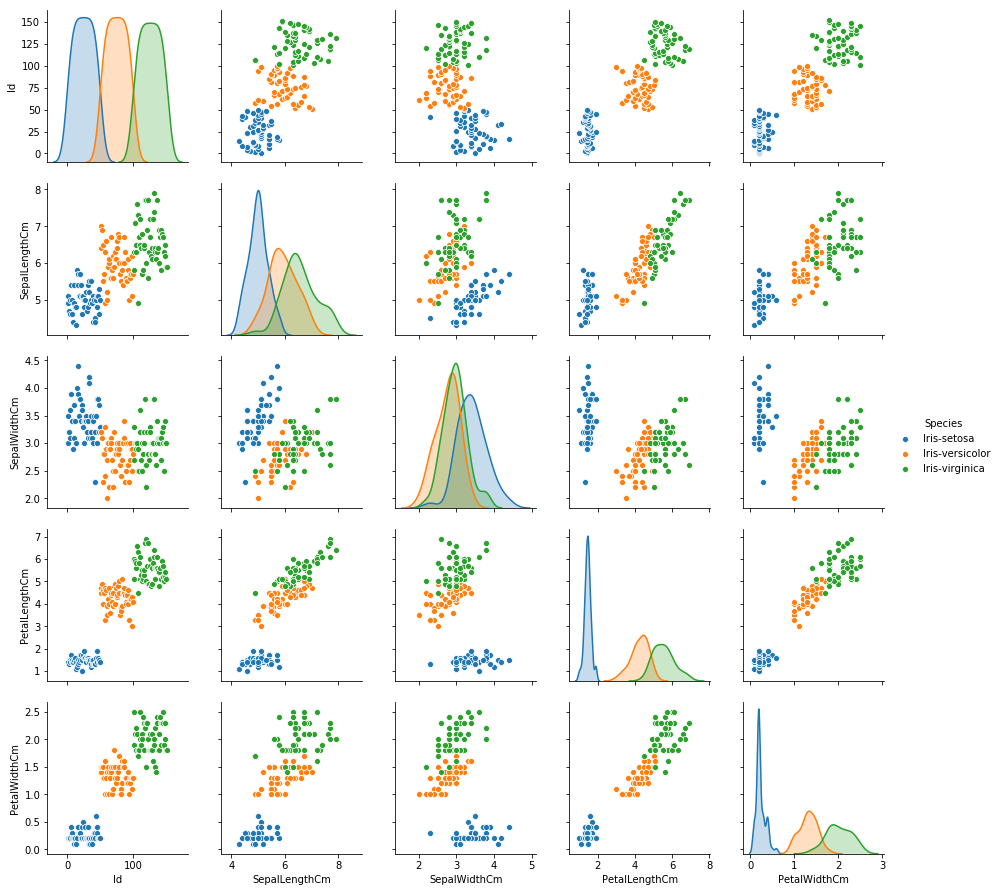

In [190]:
sns.pairplot(iris, hue='Species')

###### Please find below insight of all the variables:
1. Id: Since it is a sequence of numbers hence we can see the distribution is normalized and distribution is very much separated among all the target classes. 
2. SepalLengthCm: Distribution of SepalLengthCm is pretty much normal. SepalLength has positive correlation with SepalWidthCm for Iris-setosa class. It has positive correlation with PetalLengthCm as well for Iris-versicolor and Iris-virginica classes. 
3.SepalWidthCm: Distribution of SepalWidthCm is also pretty much normal. SepalWidth has positive correlation with SepalLengthCm for Iris-setosa class. It has positive correlation with PetalWidthCm as well for Iris-versicolor class.
4. PetalLengthCm: Distribution of Iris-setosa has very low variance in PetalLengthCm and has low PetalLengthCm values. Whereas Iris-versicolor is left skewed and Iris-virginica is right skewed. PetalLengthCm has positive correlation with SepalLengthCm and PetalWidthCm. 
5. PetalWidthCm: Distribution of Iris-setosa has very low variance in PetalLengthCm as well and has low PetalWidthCm values also. Whereas Iris-versicolor and Iris-virginica are pretty much normally distributed. PetalWidthCm has positive correlation with PetalLengthCm. 

### Summary Statistics and explain insights for at least 2 variables

###### removing 1st column 'Id' from independent list as it is just a sequence of numbers and does not impact target variable. 

In [197]:
iris_new=iris.drop('Id',axis=1)
iris_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [201]:
iris_new.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,151,NaN,NaN,NaN,5.84371,0.825314,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,151,NaN,NaN,NaN,1.20265,0.762185,0.1,0.3,1.3,1.8,2.5
Species,152,3,Iris-virginica,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Here it is showing 152 count for Species but having 150 or 151 count for other independent variables. Which shows that there are some missing values in those 4 independent variables. 
SepalLengthCm value has mean which is almost equals to median(50%) which shows that data is normally distributed. Standard Deviation is about .8 and if we see data range between 75% and Max is high compared to 25% or 50% which infers that it has few outliers. 
SepalWidthCm value has mean which is almost equals to median(50%) which shows that data is normally distributed. Standard Deviation is about .4 and if we see data range between 75% and Max is high compared to 25% or 50% which infers that it has few outliers.
PetalLengthCm has mean lower than median that infers that it has skewed data where most of the distribution is centered between 25% to 50%. 
PetalWidthCm also has mean lower than median that infers that it also has skewed data where most of the distribution is centered between 25% to 50%. 
Species has 3 unique classes where Iris-virginica has highest distribution of 52. 

In [203]:
iris_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [216]:
#Rows which has NaN in it
iris_new[iris_new.isna().any(axis=1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,5.9,NaN,NaN,NaN,Iris-virginica
151,NaN,NaN,NaN,1.8,Iris-virginica


###### if we see the rows which has NaN in it, it seems only one independent variable is given for those rows hence there is no meaning to fill those missing values with mean or median. Hence dropping those missing value rows. 

In [217]:
iris_new.dropna(axis=0,inplace=True)

In [218]:
iris_new[iris_new.isna().any(axis=1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [219]:
iris_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Correlation among all variables and give your insights

###### to find the correlation of target variable to independent variables, we need to encode target variable. 

In [220]:
le=LabelEncoder()
iris_new['Species']=le.fit_transform(iris_new['Species'])

In [221]:
iris_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [222]:
iris_new.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


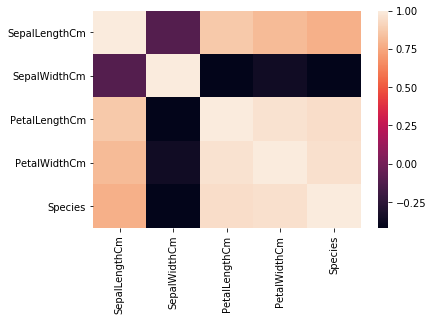

In [224]:
sns.heatmap(iris_new.corr())

###### Here if we see target variable Species has strong positive correlation with PetalLengthCm and PetalWidthCm. SepalWidthCm has weak negative correlation with it. 

### Split data in Training and Validation in 80:20

In [226]:
X=iris_new.drop('Species',axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [228]:
y=iris_new[['Species']]
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [331]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)

In [332]:
print('Training set X:',X_train.shape, '\nTraining set y:', y_train.shape)
print('Test set X:',X_test.shape, '\nTest set y:', y_test.shape)

Training set X: (120, 4) 
Training set y: (120, 1)
Test set X: (30, 4) 
Test set y: (30, 1)


### Do Feature Scaling

In [333]:
scale=StandardScaler()

In [334]:
ScaledX_train = scale.fit_transform(X_train)

In [335]:
ScaledX_test=scale.transform(X_test)

In [336]:
ScaledX_train

array([[-0.88140924,  0.72750289, -1.23547394, -1.26527703],
       [-0.40389633, -1.69139841,  0.17434798,  0.16834158],
       [-0.16513988, -1.03169805, -0.10761641, -0.22264531],
       [-0.52327456,  1.38720324, -1.23547394, -1.26527703],
       [ 1.38677706,  0.28770265,  0.56909811,  0.29867054],
       [-1.00078746,  0.50760277, -1.29186681, -1.26527703],
       [-1.00078746,  0.94740301, -1.17908106, -0.74396117],
       [ 2.22242464, -0.15209758,  1.35859839,  1.47163122],
       [-1.00078746,  0.94740301, -1.34825969, -1.13494806],
       [ 0.6705077 ,  0.28770265,  0.90745537,  1.47163122],
       [-0.04576165, -0.81179793,  0.79466962,  0.95031536],
       [-0.28451811, -1.25159817,  0.1179551 , -0.09231635],
       [-0.88140924,  0.94740301, -1.29186681, -1.13494806],
       [-0.88140924,  1.60710336, -1.17908106, -1.26527703],
       [ 0.78988593, -0.59189782,  0.51270524,  0.42899951],
       [ 0.43175125, -0.59189782,  0.62549099,  0.8199864 ],
       [ 0.07361657, -0.

In [337]:
ScaledX_test

array([[-0.04576165, -0.81179793,  0.1179551 ,  0.03801261],
       [ 0.31237303, -1.03169805,  1.076634  ,  0.29867054],
       [-0.04576165, -0.59189782,  0.79466962,  1.60196018],
       [-1.71705682,  0.28770265, -1.34825969, -1.26527703],
       [ 1.62553351,  1.16730313,  1.35859839,  1.73228915],
       [-1.12016569, -1.47149829, -0.22040216, -0.22264531],
       [-1.12016569, -0.15209758, -1.29186681, -1.26527703],
       [ 0.07361657,  0.28770265,  0.62549099,  0.8199864 ],
       [-1.00078746, -0.15209758, -1.17908106, -1.26527703],
       [-0.52327456, -0.15209758,  0.45631236,  0.42899951],
       [-0.28451811, -0.15209758,  0.45631236,  0.42899951],
       [ 0.55112948, -0.59189782,  0.79466962,  0.42899951],
       [ 1.50615529, -0.15209758,  1.24581263,  1.21097329],
       [ 1.74491174, -0.3719977 ,  1.47138414,  0.8199864 ],
       [-1.00078746,  0.72750289, -1.17908106, -1.0046191 ],
       [-0.88140924,  0.50760277, -1.12268818, -0.87429013],
       [ 0.55112948, -0.

### Train and Fit NaiveBayes Model

In [338]:
model = GaussianNB()
model.fit(ScaledX_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [339]:
scores = cross_val_score(model, ScaledX_train, y_train, cv=5, scoring='accuracy')
accuracy=scores.mean()
print('Accuracy:', accuracy)

Accuracy: 0.9665757575757576


In [340]:
# summarize the fit of the model
expected = y_test
predicted = model.predict(ScaledX_test)
print('\nConfusion Matrix:')
print(metrics.confusion_matrix(expected, predicted))
print(metrics.classification_report(expected, predicted))



Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



###### Analyzing the confusion matrix
This is a multiclass classification where there are 3 target classes ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica') encoded as 0,1,2 respectively.  
Since it is multiclass confusion matrix, diagonal line is showing TP (True Positives) for each class. we correctly predicted that they do belongs to that flower class. 
- If we see the classification report, it shows that for 0 which is 'Iris-setosa', we were able to predict 100% correct flower type, also we were able to detect correct flower type as 100% hence f1 score is 100%
- 1 which is 'Iris-versicolor', we were able to predict 83% correct flower type, also we were able to detect correct flower type as 91% hence f1 score is 87%
- 2 which is 'Iris-virginica', we were able to predict 90% correct flower type, also we were able to detect correct flower type as 82% hence f1 score is 86%


In [328]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)